# Business Understanding

The aim of this project is to analyze and predict the occurrence of fires in the Brazilian Amazon using various datasets. These datasets include historical fire data, deforestation data, and climate phenomena (El Niño and La Niña events). By building reliable predictive models, we aim to identify key factors influencing fire occurrences and provide insights for preventive measures.

**Context**

* El Niño/La Niña Phenomena: These are climate patterns in the Pacific Ocean that have wide-reaching effects on global weather, ecosystems, and economies. El Niño is characterized by the warming of sea surface temperatures, while La Niña involves cooling. Understanding their impact is crucial for predicting climate-related anomalies and preparing for natural disasters.

* Amazon Fires: The Brazilian Amazon is a vital ecological region, often referred to as the "lungs of the Earth" due to its significant role in carbon sequestration. Fires in the Amazon have drastic impacts on biodiversity, climate change, and indigenous communities. Analyzing fire data helps in understanding the patterns and causes of these fires, which is essential for mitigation and policy formulation.

* Deforestation Areas: Deforestation in the Amazon has profound implications for climate change, biodiversity loss, and the livelihoods of local communities. By analyzing deforestation trends, we can identify the drivers of forest loss and develop strategies to combat illegal logging and promote sustainable land use.

**Business Objective**

Utilize historical fire data to predict high-risk periods and regions for fires. This information is critical for fire management and public policies, enabling them to allocate resources more effectively and implement preventative measures.

# Data Understanding

Let's first load and understand the provided datasets.

1. **inpe_brazilian_amazon_fires_1999_2019.csv**: Contains data on fire occurrences in the Brazilian Amazon from 1999 to 2019.

  * Start Year: The year when the El Niño or La Niña event began. This helps in identifying the onset of the climatic phenomenon.
  * End Year: The year when the event ended. This helps in determining the duration of the event.
  * Phenomenon: Specifies whether the event was El Niño or La Niña. This binary classification is crucial for distinguishing between the two opposing climate patterns.
  * Severity: Indicates the severity of the event, which can be categorized as Weak, Moderate, or Strong. Understanding the severity helps in assessing the potential impact of the event.

2. **def_area_2004_2019.csv**: Contains data on deforested areas in the Brazilian Amazon from 2004 to 2019.

  * Year: The year when the fires were recorded. This temporal aspect is essential for analyzing trends over time.
  * Month: The month when the fires were recorded. This helps in understanding seasonal patterns in fire occurrences.
  * State: The state in Brazil where the fires occurred. This geographic information is vital for identifying regional hotspots and variations.
  * Latitude: The latitude coordinate of the firespot. Together with longitude, it helps in precisely mapping the fire locations.
  * Longitude: The longitude coordinate of the firespot. This, along with latitude, aids in detailed geospatial analysis.
  * Firespots: The number of firespots recorded. This quantifies the extent of fire incidents, which is crucial for impact assessment and resource allocation.

3. **el_nino_la_nina_1999_2019.csv**: Contains data on El Niño and La Niña events from 1999 to 2019.

  * Year: The year of the deforestation record. This helps in tracking deforestation trends over time.
  * State Columns (AC, AM, AP, MA, MT, PA, RO, RR, TO): Each column represents a state in Brazil (e.g., Acre (AC), Amazonas (AM), Amapá (AP), Maranhão (MA), Mato Grosso (MT), Pará (PA), Rondônia (RO), Roraima (RR), Tocantins (TO)). These columns contain the deforestation area measured in square kilometers or hectares for each respective state. This helps in identifying which states are most affected by deforestation.
  * AMZ LEGAL: Represents the total deforestation area for the Amazon Legal region, which encompasses all the states mentioned. This aggregated figure is important for assessing the overall impact on the Amazon rainforest.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load datasets
fires_data = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
deforestation_data = pd.read_csv('def_area_2004_2019.csv')
climate_data = pd.read_csv('el_nino_la_nina_1999_2019.csv')

In [3]:
# Display the first few rows of each dataset
print(fires_data.head())

   year  month        state   latitude  longitude  firespots
0  1999      1     AMAZONAS  -2.371113 -59.899933          3
1  1999      1     MARANHAO  -2.257395 -45.487831         36
2  1999      1  MATO GROSSO -12.660633 -55.057989         18
3  1999      1         PARA  -2.474820 -48.546967         87
4  1999      1     RONDONIA -12.861700 -60.513100          1


In [4]:
# Check data types and missing values
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [5]:
print(deforestation_data)

    Ano/Estados   AC    AM   AP    MA     MT    PA    RO   RR   TO  AMZ LEGAL
0          2004  728  1232   46   755  11814  8870  3858  311  158      27772
1          2005  592   775   33   922   7145  5899  3244  133  271      19014
2          2006  398   788   30   674   4333  5659  2049  231  124      14286
3          2007  184   610   39   631   2678  5526  1611  309   63      11651
4          2008  254   604  100  1271   3258  5607  1136  574  107      12911
5          2009  167   405   70   828   1049  4281   482  121   61       7464
6          2010  259   595   53   712    871  3770   435  256   49       7000
7          2011  280   502   66   396   1120  3008   865  141   40       6418
8          2012  305   523   27   269    757  1741   773  124   52       4571
9          2013  221   583   23   403   1139  2346   932  170   74       5891
10         2014  309   500   31   257   1075  1887   684  219   50       5012
11         2015  264   712   25   209   1601  2153  1030  156   

In [6]:
# Check data types and missing values
deforestation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano/Estados  16 non-null     int64
 1   AC           16 non-null     int64
 2   AM           16 non-null     int64
 3   AP           16 non-null     int64
 4   MA           16 non-null     int64
 5   MT           16 non-null     int64
 6   PA           16 non-null     int64
 7   RO           16 non-null     int64
 8   RR           16 non-null     int64
 9   TO           16 non-null     int64
 10  AMZ LEGAL    16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [7]:
# Renaming the attribute Ano/Estados
deforestation_data.rename(columns={'Ano/Estados': 'year'}, inplace=True)

In [8]:
print(climate_data)

    start year  end year phenomenon     severity
0         2004      2005    El Nino         Weak
1         2006      2007    El Nino         Weak
2         2014      2015    El Nino         Weak
3         2018      2019    El Nino         Weak
4         2002      2003    El Nino     Moderate
5         2009      2010    El Nino     Moderate
6         2015      2016    El Nino  Very Strong
7         2000      2001    La Nina         Weak
8         2005      2006    La Nina         Weak
9         2008      2009    La Nina         Weak
10        2016      2017    La Nina         Weak
11        2017      2018    La Nina         Weak
12        2011      2012    La Nina     Moderate
13        1999      2000    La Nina       Strong
14        2007      2008    La Nina       Strong
15        2010      2011    La Nina       Strong


In [9]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start year  16 non-null     int64 
 1   end year    16 non-null     int64 
 2   phenomenon  16 non-null     object
 3   severity    16 non-null     object
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


# Exploratory Data Analysis

## Summary Statistics

In [10]:
# Display basic statistics
fires_data.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


In [11]:
deforestation_data.describe()

,year,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2011.500000,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,4.760952,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,2004.000000,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,2007.750000,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,2011.500000,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,2015.250000,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,2019.000000,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


In [12]:
climate_data.describe()

,start year,end year
count,16.000000,16.000000
mean,2008.812500,2009.812500
std,6.024602,6.024602
min,1999.000000,2000.000000
25%,2004.750000,2005.750000
50%,2008.500000,2009.500000
75%,2014.250000,2015.250000
max,2018.000000,2019.000000


## Temporal Analysis

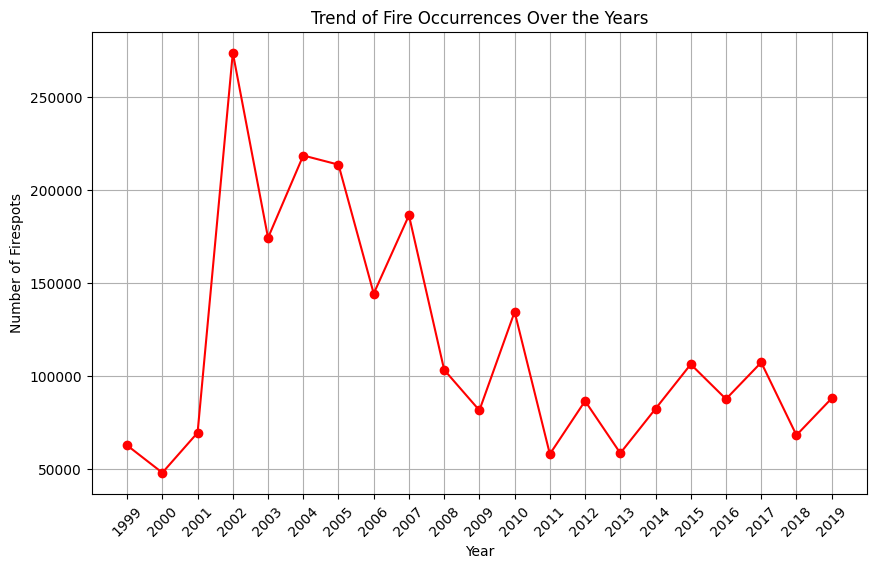

In [13]:
import matplotlib.pyplot as plt

# Plotting trend of fire occurrences over the years
plt.figure(figsize=(10, 6))
fires_data.groupby('year')['firespots'].sum().plot(kind='line', marker='o', color='red')
plt.title('Trend of Fire Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Firespots')
plt.xticks(fires_data['year'].unique(), rotation=45)
plt.grid(True)
plt.show()

The plot shows a significant spike in firespots in the early 2000s, peaking in 2003. During this period, there was a substantial increase in agricultural activities, including cattle ranching and soy cultivation. The farmers often used fires to clear land for agriculture. Furthermore, during this period, policies and incentives were in place that encouraged land clearing and agricultural expansion, leading to increased deforestation and fire use.

After this period, there was a fluctuating decrease. From 2015 onwards, fire occurrences stabilize, ranging between 70.000 and 120.000 annually.

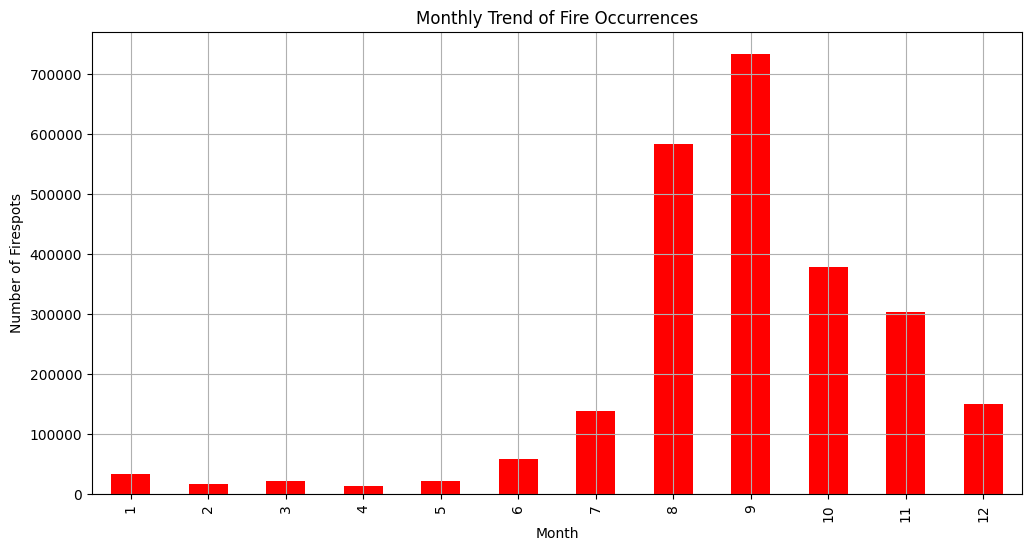

In [14]:
# Plotting monthly trend of fire occurrences
plt.figure(figsize=(12, 6))
fires_data.groupby('month')['firespots'].sum().plot(kind='bar', color='red')
plt.title('Monthly Trend of Fire Occurrences')
plt.xlabel('Month')
plt.ylabel('Number of Firespots')
plt.grid(True)
plt.show()

The first six months of the year have low occurrences. Highest number of firespots occurs from July to October, with September being the peak month. This pattern can be attributed to the Amazon's pronounced dry season during these months, which results in reduced rainfall and drier vegetation that is more susceptible to catching fire. Additionally, agricultural practices such as slash-and-burn are common during the dry season, as farmers and landowners clear land for planting. These fires often spread uncontrollably, contributing to the spike in fire occurrences.

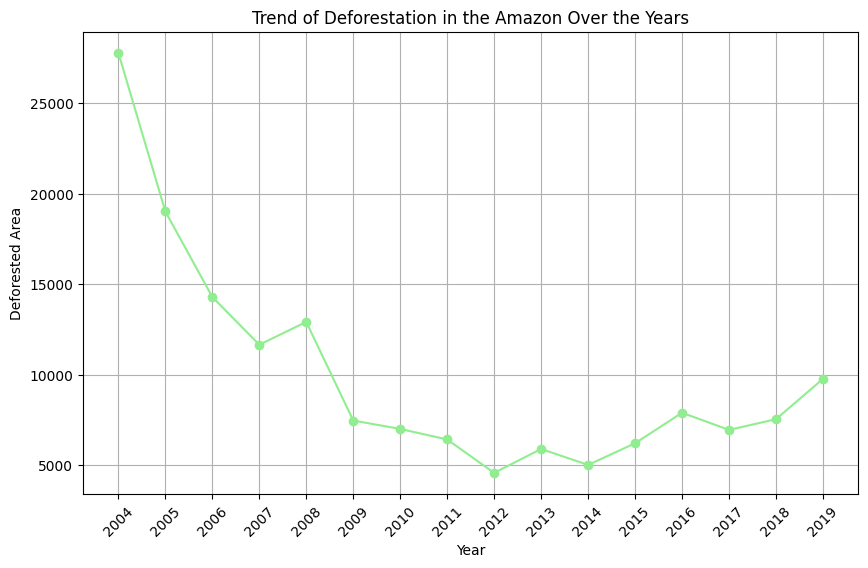

In [15]:
# Plotting trend of deforestation over the years
plt.figure(figsize=(10, 6))
deforestation_data.set_index('year')['AMZ LEGAL'].plot(kind='line', marker='o', color='lightgreen')
plt.title('Trend of Deforestation in the Amazon Over the Years')
plt.xlabel('Year')
plt.ylabel('Deforested Area')
plt.xticks(deforestation_data['year'].unique(), rotation=45)
plt.grid(True)
plt.show()

There was a significant decline in deforested areas from 2004 to 2012, followed by a period of relative stability and then a gradual increase starting around 2014.

The initial sharp decrease is attributed to stricter environmental regulations and increased monitoring efforts by the Brazilian government and international organizations. Programs like the Action Plan for the Prevention and Control of Deforestation in the Legal Amazon (PPCDAm), implemented in 2004, played a crucial role in reducing deforestation rates during this period.

However, starting around 2014, there is a noticeable upward trend in deforestation. This increase can be linked to several factors. Economic factors, such as the demand for agricultural products like soy and beef, drive land clearing for farming and cattle ranching. Changes in government policies and reduced funding for environmental protection agencies have contributed to the resurgence of deforestation activities.

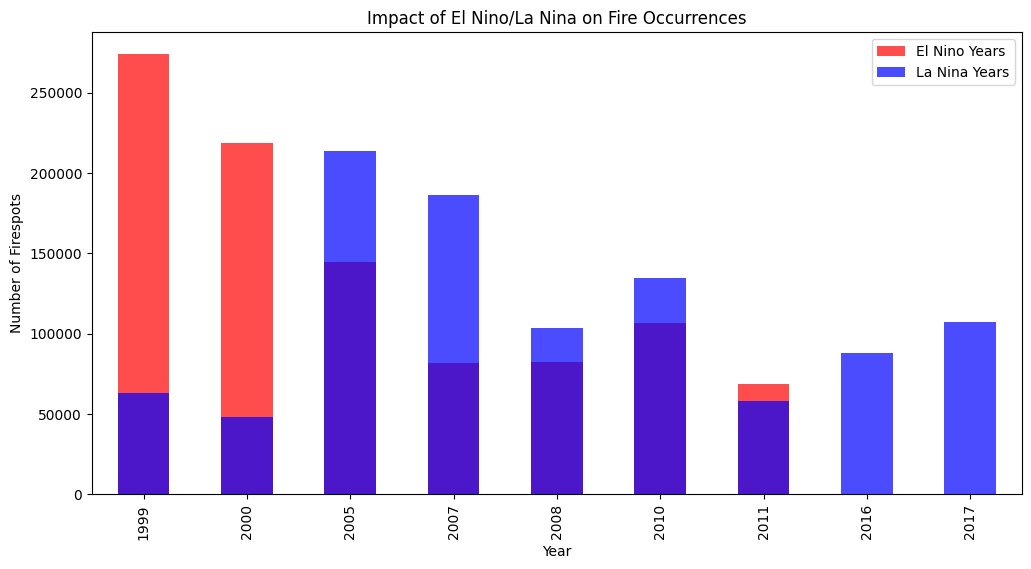

In [16]:
# Plotting the impact of El Niño/La Niña on fires
elnino_years = climate_data[climate_data['phenomenon'] == 'El Nino']['start year']
lanina_years = climate_data[climate_data['phenomenon'] == 'La Nina']['start year']

plt.figure(figsize=(12, 6))
fires_data[fires_data['year'].isin(elnino_years)].groupby('year')['firespots'].sum().plot(kind='bar', color='red', alpha=0.7, label='El Nino Years')
fires_data[fires_data['year'].isin(lanina_years)].groupby('year')['firespots'].sum().plot(kind='bar', color='blue', alpha=0.7, label='La Nina Years')
plt.title('Impact of El Nino/La Nina on Fire Occurrences')
plt.xlabel('Year')
plt.ylabel('Number of Firespots')
plt.legend()
plt.show()

* **El Niño Years:** El Niño years, marked in red, show a higher number of firespots compared to La Niña years. For example, in 1999 and 2000, which were El Niño years, there is a substantial increase in fire occurrences. El Niño typically brings drier and hotter conditions to the Amazon, making the region more susceptible to fires.

* **La Niña Years:** La Niña years, marked in blue, generally show lower fire occurrences. However, there are notable exceptions, such as 2005 and 2010, where La Niña years still experienced significant fire activity. La Niña often brings wetter conditions, which usually reduce fire risk, but other factors such as land use changes and deforestation practices can still lead to high fire occurrences.

* **Mixed Impact:** Some years, like 2005 and 2010, show substantial fire activity during La Niña years, indicating that while climatic conditions play a significant role, human activities such as deforestation and agricultural practices also heavily influence fire occurrences.

## Geospatial Analysis

This analysis is crucial for understanding the spatial distribution and patterns of fires in the Amazon.

By mapping fire occurrences, it is possible to identify hotspots and assess the impact of fires on different regions. This information helps in targeting fire prevention and approprietly control efforts to allocate resources for firefighting. Additionally, geospatial analysis can reveal correlations between fires and human activities.

Future work could further improve the visualization of geospatial areas, adequately delimiting states, cities and even indigenous protected areas and large farms.

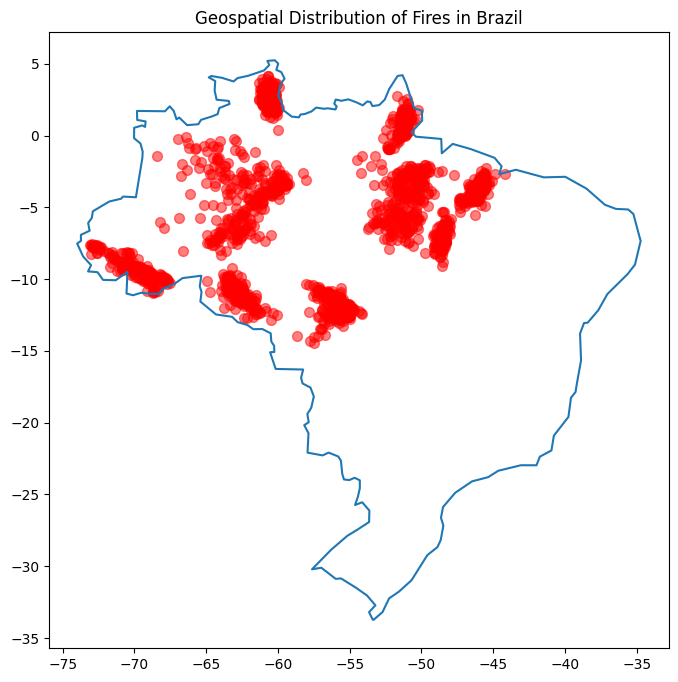

In [17]:
import geopandas as gpd
from shapely.geometry import Point
from IPython.utils import io

with io.capture_output() as captured:
  # Convert fires data to a GeoDataFrame
  geometry = [Point(xy) for xy in zip(fires_data['longitude'], fires_data['latitude'])]
  fires_gdf = gpd.GeoDataFrame(fires_data, geometry=geometry)

  # Read the world map shapefile and filter for Brazil
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  brazil = world[world.name == "Brazil"]

# Plotting fires on a map of Brazil only
fig, ax = plt.subplots(figsize=(8, 8))
brazil.boundary.plot(ax=ax)
fires_gdf.plot(ax=ax, markersize=50, color='red', alpha=0.5)
plt.title('Geospatial Distribution of Fires in Brazil')
plt.show()

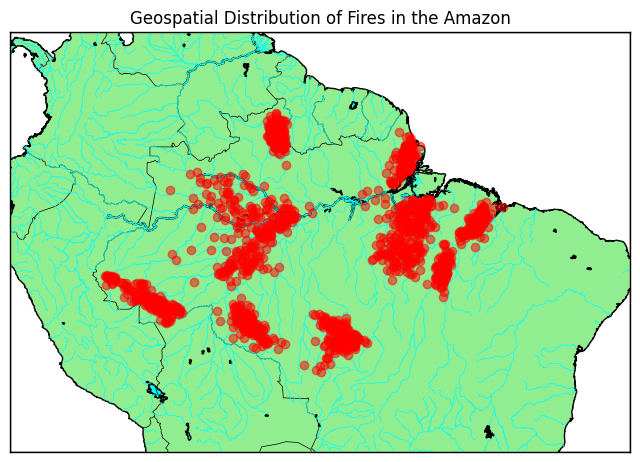

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Plotting fires on a map using Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='merc', llcrnrlat=-20, urcrnrlat=10, llcrnrlon=-80, urcrnrlon=-35, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.drawrivers(color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Plot fire occurrences
lons = fires_data['longitude'].values
lats = fires_data['latitude'].values
x, y = m(lons, lats)
m.scatter(x, y, marker='o', color='red', alpha=0.5, zorder=5)

plt.title('Geospatial Distribution of Fires in the Amazon')
plt.show()

## Correlation Analysis

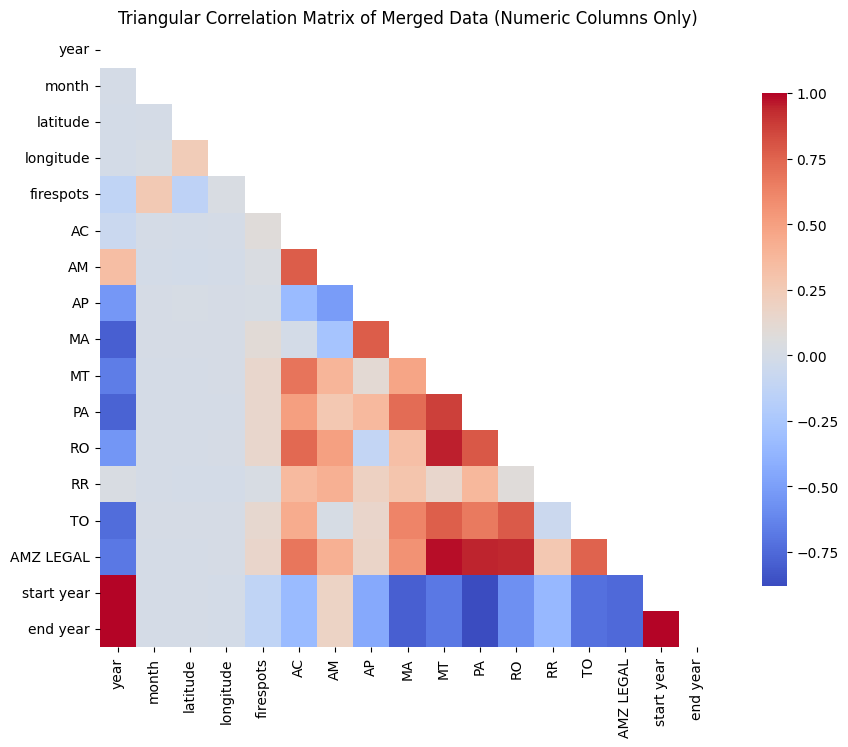

In [19]:
import seaborn as sns

# Merging datasets for correlation analysis
deforestation_data['year']
merged_data = fires_data.merge(deforestation_data, left_on='year',
                               right_on='year', how='inner')
merged_data = merged_data.merge(climate_data, left_on='year',
                                right_on='start year', how='left')

# Exclude non-numeric columns for correlation calculation
numeric_cols = merged_data.select_dtypes(include=[float, int]).columns

# Calculating correlations using only numeric columns
correlation_matrix = merged_data[numeric_cols].corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False,
            cbar_kws={"shrink": .8}, square=True)

# Title and display
plt.title('Triangular Correlation Matrix of Merged Data (Numeric Columns Only)')
plt.show()

# Data Preparation

Data preparation is crucial for ensuring the quality and accuracy of the analysis and modeling. It involves cleaning the data, handling missing values, integrating datasets, and engineering new features to enhance the predictive power of the models.

In [20]:
# Check for missing values
missing_values = fires_data.isnull().sum()

# Handle missing values if any (e.g., drop or impute)
fires_data_clean = fires_data.dropna()

# Ensure correct data types
fires_data_clean['year'] = fires_data_clean['year'].astype(int)
fires_data_clean['month'] = fires_data_clean['month'].astype(int)
fires_data_clean['firespots'] = fires_data_clean['firespots'].astype(int)

# Display the cleaned data
fires_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


First, the fires data is merged with the deforestation data, combining fire occurrences with deforestation metrics to analyze the impact of deforestation on fire occurrences.

Next, the integrated dataset is further merged with climate data on the 'year' column, incorporating information on climate phenomena such as El Niño and La Niña to examine their influence on fire occurrences.

In [21]:
# Integrate datasets
climate_data.rename(columns={'start year': 'start_year', 'end year': 'end_year'}, inplace=True)

# Merge fires data with deforestation data
integrated_data = fires_data_clean.merge(deforestation_data, on='year', how='left')

# Merge the result with climate data
integrated_data = integrated_data.merge(climate_data, left_on='year', right_on='start_year', how='left')

# Drop columns that are not needed
integrated_data.drop(columns=['start_year', 'end_year'], inplace=True)

# Display the integrated data
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2104 non-null   int64  
 1   month       2104 non-null   int64  
 2   state       2104 non-null   object 
 3   latitude    2104 non-null   float64
 4   longitude   2104 non-null   float64
 5   firespots   2104 non-null   int64  
 6   AC          1649 non-null   float64
 7   AM          1649 non-null   float64
 8   AP          1649 non-null   float64
 9   MA          1649 non-null   float64
 10  MT          1649 non-null   float64
 11  PA          1649 non-null   float64
 12  RO          1649 non-null   float64
 13  RR          1649 non-null   float64
 14  TO          1649 non-null   float64
 15  AMZ LEGAL   1649 non-null   float64
 16  phenomenon  1607 non-null   object 
 17  severity    1607 non-null   object 
dtypes: float64(12), int64(3), object(3)
memory usage: 296.0+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'state' column
label_encoder = LabelEncoder()
integrated_data['state_encoded'] = label_encoder.fit_transform(integrated_data['state'])

# Create a mapping from encoded labels to original state names
state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the encoded state column and the mapping
encoded_states = integrated_data[['state', 'state_encoded']].drop_duplicates().sort_values(by='state_encoded')
state_mapping

{'ACRE': 0,
 'AMAPA': 1,
 'AMAZONAS': 2,
 'MARANHAO': 3,
 'MATO GROSSO': 4,
 'PARA': 5,
 'RONDONIA': 6,
 'RORAIMA': 7,
 'TOCANTINS': 8}

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encode the 'severity' column using one-hot encoding
integrated_data = pd.get_dummies(integrated_data, columns=['severity'])

# Renaming attribute
integrated_data.rename(columns={'severity_Very Strong': 'severity_VeryStrong'}, inplace=True)

In [24]:
# Feature Engineering: Create season feature
integrated_data['season'] = integrated_data['month'].apply(lambda x: (x % 12 + 3) // 3)

# Feature Engineering: Encode climate phenomena
integrated_data['el_nino'] = integrated_data['phenomenon'].apply(lambda x: 1 if x == 'El Nino' else 0)
integrated_data['la_nina'] = integrated_data['phenomenon'].apply(lambda x: 1 if x == 'La Nina' else 0)

# Drop original climate phenomenon column
integrated_data.drop(columns=['phenomenon'], inplace=True)

In [25]:
# Select only the relevant features for modeling
features = ['year', 'month', 'state_encoded', 'season', 'el_nino', 'la_nina',
            'severity_Weak', 'severity_Moderate', 'severity_Strong',
            'severity_VeryStrong']

target = 'firespots'

# Final dataset for modeling
modeling_data = integrated_data[features + [target]]

# Display the final dataset
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   year                 2104 non-null   int64
 1   month                2104 non-null   int64
 2   state_encoded        2104 non-null   int64
 3   season               2104 non-null   int64
 4   el_nino              2104 non-null   int64
 5   la_nina              2104 non-null   int64
 6   severity_Weak        2104 non-null   bool 
 7   severity_Moderate    2104 non-null   bool 
 8   severity_Strong      2104 non-null   bool 
 9   severity_VeryStrong  2104 non-null   bool 
 10  firespots            2104 non-null   int64
dtypes: bool(4), int64(7)
memory usage: 123.4 KB


In [26]:
# First five rows of the data
print(modeling_data.head().to_string(index=False))

 year  month  state_encoded  season  el_nino  la_nina  severity_Weak  severity_Moderate  severity_Strong  severity_VeryStrong  firespots
 1999      1              2       1        0        1          False              False             True                False          3
 1999      1              3       1        0        1          False              False             True                False         36
 1999      1              4       1        0        1          False              False             True                False         18
 1999      1              5       1        0        1          False              False             True                False         87
 1999      1              6       1        0        1          False              False             True                False          1


# Data Processing

This section details the process of preparing a dataset for predictive modeling and outlines the steps involved in selecting and tuning machine learning models for better performance. Our data, segmented by year, is split into training sets for model development and validation sets to evaluate model accuracy.

## Modelling

Initially, the data from before 2019 is used for training, while data from the year 2019 serves as our validation set. The 'year' attribute is removed to prevent it from being used as a feature in our models.

The training data is further divided into subsets for training and testing, ensuring our model can generalize well to new, unseen data.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data = modeling_data[modeling_data['year'] < 2019]
validation_data = modeling_data[modeling_data['year'] == 2019]

# Remove attribute
train_data.drop(columns=['year'], inplace=True)
validation_data.drop(columns=['year'], inplace=True)

# Updated list of the relevant features for modeling
features = ['month', 'state_encoded', 'season', 'el_nino', 'la_nina',
            'severity_Weak', 'severity_Moderate', 'severity_Strong',
            'severity_VeryStrong']

# Split the training dataset into features and target variable
X = train_data[features]
y = train_data[target]

# Split the validation dataset into features and target variable
X_validation = validation_data[features]
y_validation = validation_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=343)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 9), (401, 9), (1600,), (401,))

In [46]:
X_validation.shape, y_validation.shape

((103, 9), (103,))

Below, multiple advanced machine learning models such as RandomForest, LightGBM, XGBoost, MLPRegressor, and LSTM were introduced. Each model is tuned with a specific set of hyperparameters using **RandomizedSearchCV** combined with a **Time Series Cross Validation** to ensure the time-dependent nature of the data is respected.

In [30]:
from scipy.stats import uniform, randint, loguniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor
from scipy.stats import uniform, randint, loguniform

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define the build function for KerasRegressor
def build_lstm_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Define the models and their parameter grids
models = {
    'RandomForest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'MLPRegressor': MLPRegressor(),
    'LSTM': KerasRegressor(build_fn=build_lstm_model)
}

param_grids = {
    'RandomForest': {
        'n_estimators': randint(100, 500),
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': randint(2, 11)
    },
    'LightGBM': {
        'num_leaves': randint(20, 100),
        'learning_rate': loguniform(1e-3, 1e-1),
        'n_estimators': randint(100, 500)
    },
    'XGBoost': {
        'n_estimators': randint(100, 500),
        'learning_rate': loguniform(1e-3, 1e-1),
        'max_depth': randint(3, 10)
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(i,) for i in range(50, 201, 50)] + [(i, j) for i in range(50, 201, 50) for j in range(50, 201, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    },
    'LSTM': {
        'model__units': randint(30, 100),
        'model__optimizer': ['adam', 'sgd'],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20, 30]
    }
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for model_name in models:
    with io.capture_output() as captured:
      if model_name == 'LSTM':
          # Special handling for neural networks with Keras
          random_search = RandomizedSearchCV(models[model_name], param_grids[model_name], n_iter=20, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error', refit=True)
          X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
          random_search.fit(X_train_reshaped, y_train)
      else:
          random_search = RandomizedSearchCV(models[model_name], param_grids[model_name], n_iter=10, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error')
          random_search.fit(X_train, y_train)
      best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")

Best parameters for RandomForest: {'max_depth': 40, 'min_samples_split': 9, 'n_estimators': 423}
Best parameters for LightGBM: {'learning_rate': 0.020251937417919242, 'n_estimators': 391, 'num_leaves': 35}
Best parameters for XGBoost: {'learning_rate': 0.01637179674373565, 'max_depth': 7, 'n_estimators': 203}
Best parameters for MLPRegressor: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 200), 'activation': 'relu'}
Best parameters for LSTM: {'batch_size': 16, 'epochs': 20, 'model__optimizer': 'adam', 'model__units': 46}


In [31]:
best_models

{'RandomForest': RandomForestRegressor(max_depth=40, min_samples_split=9, n_estimators=423),
 'LightGBM': LGBMRegressor(learning_rate=0.020251937417919242, n_estimators=391,
               num_leaves=35),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01637179674373565,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=203, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'MLPRegressor

## Model Evaluation

Now, the performance of various machine learning models that have been trained and tuned in the earlier sections were assessed. This is done using popular metrics such as:

**Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Mean Absolute Error (MAE)**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**R-squared (R2) value**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y})^2}
$$

In [32]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Initialize dictionaries to store evaluation results
evaluation_results = {}
predictions = {}

# Evaluate each model
for model_name, model in best_models.items():
    if model_name == 'LSTM':
        # Reshape the test data for LSTM
        X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
        y_pred = model.predict(X_test_reshaped)
    else:
        y_pred = model.predict(X_test)

    # Clip negative values in predictions
    y_pred = np.clip(y_pred, 0, None)

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    predictions[model_name] = y_pred

# Display the evaluation results
print(pd.DataFrame(evaluation_results).T.round(4))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
                   RMSE        MAE      R2
RandomForest  1875.1296   659.1897  0.5286
LightGBM      1909.6545   708.3989  0.5111
XGBoost       2056.2103   714.0789  0.4331
MLPRegressor  2415.0266  1288.5354  0.2181
LSTM          2554.9659  1199.6971  0.1248


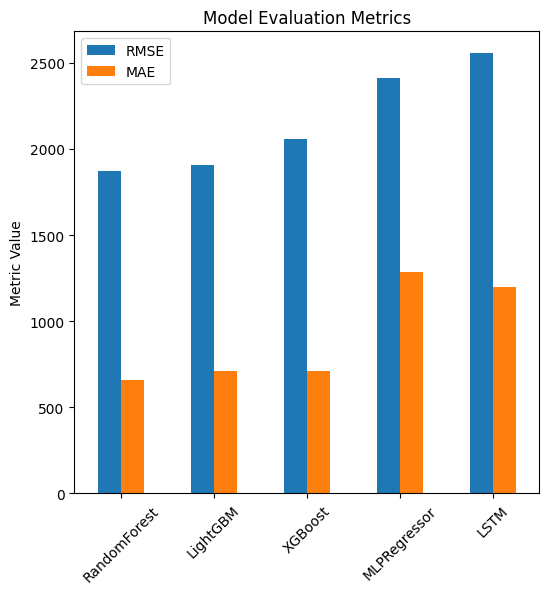

In [33]:
# Convert the evaluation results into a DataFrame
evaluation_df = pd.DataFrame(evaluation_results).T
evaluation_df[['RMSE','MAE']].plot(kind='bar', figsize=(6, 6))
plt.title('Model Evaluation Metrics')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Metric Value')
plt.show()

Overall, **RandomForest** emerges as the most effective model for this dataset, striking a good balance between error minimization and variance explanation. The results also suggest that more straightforward tree-based models (RandomForest, LightGBM) are outperforming more complex models like MLP and LSTM in this specific scenario, possibly due to overfitting or insufficient tuning of the neural network models.

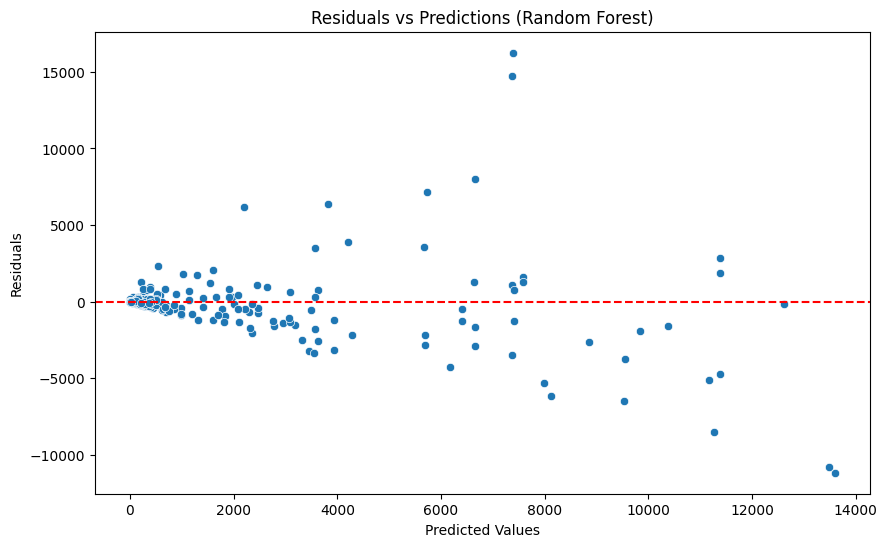

In [34]:
# Plot residuals for RandomForest as an example
if 'RandomForest' in best_models:
    rf_model = best_models['RandomForest']
    y_pred = rf_model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Residuals vs Predictions (Random Forest)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

### Feature Importance Analysis

This section delves into the feature importance and partial dependency aspects of our machine learning models. This analysis is crucial as it helps in understanding which features are most influential in predicting the outcomes and how different feature values relate to the model's predictions.

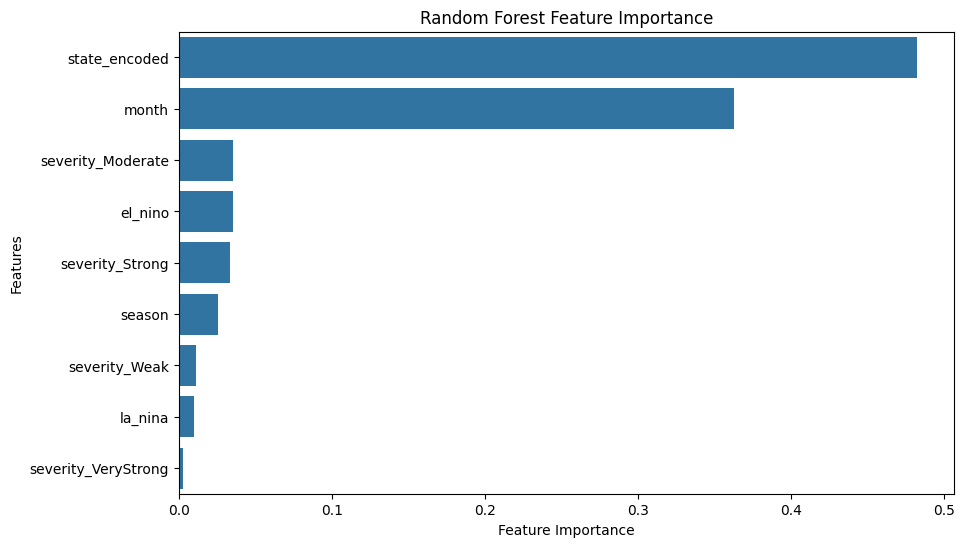

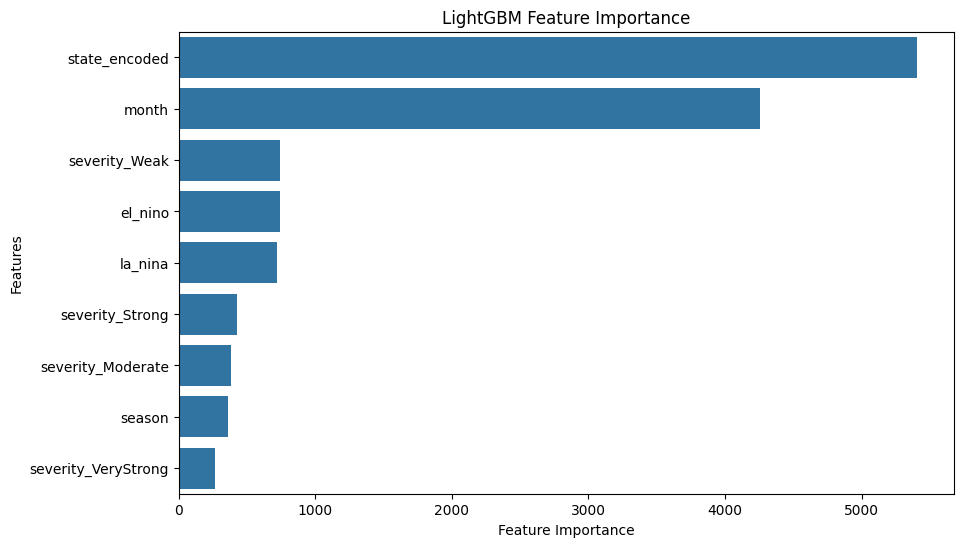

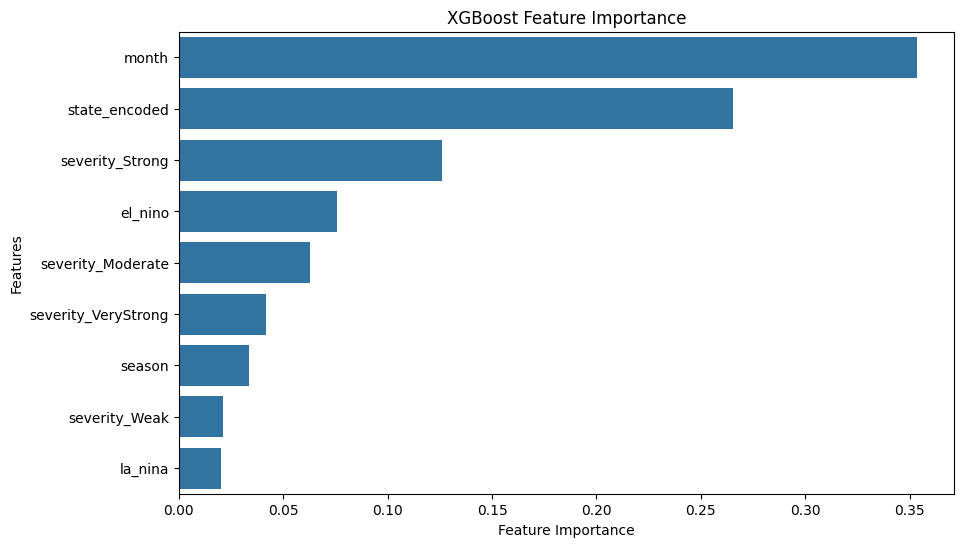

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance for RandomForest
def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(features)[indices])
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()

# Assuming 'best_models' dictionary contains the best estimator for each model
# Plot feature importance for RandomForest
if 'RandomForest' in best_models:
    rf_model = best_models['RandomForest']
    plot_feature_importance(rf_model, X.columns, 'Random Forest Feature Importance')

# Plot feature importance for LightGBM
if 'LightGBM' in best_models:
    lgb_model = best_models['LightGBM']
    plot_feature_importance(lgb_model, X.columns, 'LightGBM Feature Importance')

# Plot feature importance for XGBoost
if 'XGBoost' in best_models:
    xgb_model = best_models['XGBoost']
    plot_feature_importance(xgb_model, X.columns, 'XGBoost Feature Importance')


Analyzing the feature importance across all three models (XGBoost, LightGBM, and Random Forest) based on the uploaded charts, several consistent patterns and notable differences emerge, highlighting how each model values the input features:

* All models consistently rank the state as the top features, indicating that the geographical location is crucial in predicting the outcomes. This suggests that certain states may have unique characteristics or conditions affecting the predictions significantly.
* The month also appears as a key feature across all models. This shows the importance of seasonal and monthly variations, which could relate to environmental or temporal patterns affecting the data.
* The severity of the climatical occurence (la niña or el niño) frequently appear across the models, pointing to the impact of the event's intensity on the predictions.

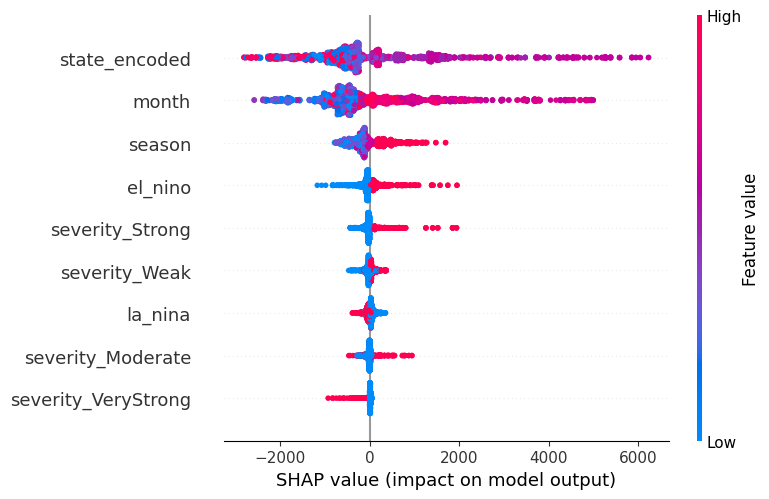

In [37]:
import shap

# SHAP values for LightGBM
if 'LightGBM' in best_models:
    lgb_model = best_models['LightGBM']
    explainer = shap.Explainer(lgb_model)
    shap_values = explainer(X)

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X)

The SHAP results also indicates that the state and month appeares as the most important features, but here is followed by the season of occurence, which is directly related with the month.

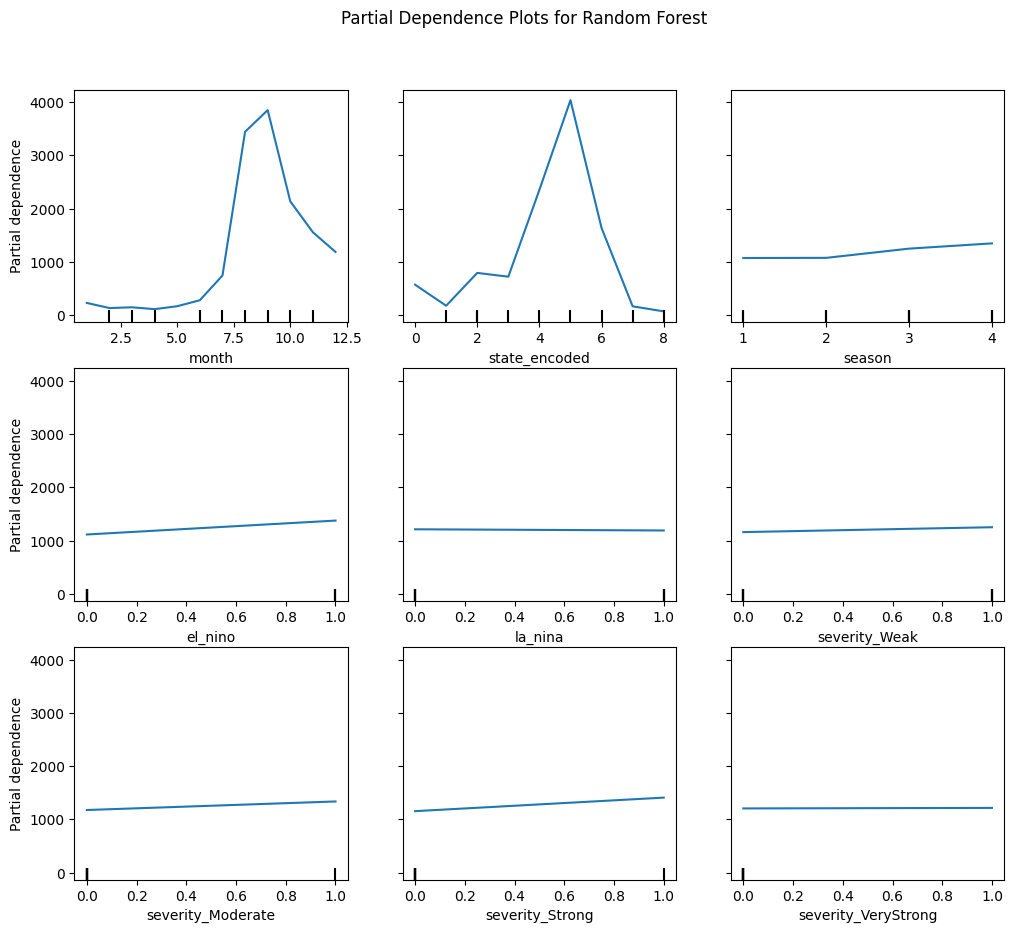

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Assuming the best RandomForest model is used
if 'RandomForest' in best_models:
    rf_model = best_models['RandomForest']

    # Create a figure for the plots
    fig, ax = plt.subplots(figsize=(12, 10))

    # Generate the partial dependence plots
    display = PartialDependenceDisplay.from_estimator(
        rf_model, X, features, ax=ax, grid_resolution=50
    )

    plt.suptitle('Partial Dependence Plots for Random Forest')
    plt.subplots_adjust(top=0.9)  # Adjust title
    plt.show()

- **Temporal Dynamics:** The significant variation in predictions based on the 'Month' feature emphasizes the need to understand seasonal or monthly cycles impacting the phenomena being modeled.
- **Geographic Specificity:** The strong response at certain state codes highlights that geographical factors are crucial, possibly due to unique regional characteristics or events.
- **Limited Impact of Climatic Phenomens:** The minimal influence of El Niño, La Niña, and severity levels suggests that other factors captured by the model are more pivotal in driving the predictions. This could be an area for further investigation to understand if these features should be modeled differently or if additional data could enhance their predictive value.

# Predicting 2019 firespots

This section presents a comprehensive validation of the developed models to predict firespot occurrences for the year 2019.

In [51]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Initialize dictionaries to store evaluation results
evaluation_results = {}
predictions = {}

# Evaluate each model
for model_name, model in best_models.items():
    if model_name == 'LSTM':
        # Reshape the test data for LSTM
        X_validation_reshaped = X_validation.values.reshape((X_validation.shape[0], X_validation.shape[1], 1))
        y_pred = model.predict(X_validation_reshaped)
    else:
        y_pred = model.predict(X_validation)

    # Clip negative values in predictions
    y_pred = np.clip(y_pred, 0, None)
    y_pred = y_pred.astype('int')

    rmse = root_mean_squared_error(y_validation, y_pred)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    evaluation_results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    predictions[model_name] = y_pred

# Display the evaluation results
print(pd.DataFrame(evaluation_results).T.round(4))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                   RMSE        MAE      R2
RandomForest   941.2561   452.4175  0.7106
LightGBM      1000.0166   511.2039  0.6733
XGBoost        946.1430   484.5437  0.7076
MLPRegressor  1612.3947  1033.3107  0.1507
LSTM          1607.8671   959.5146  0.1555


In [50]:
round(y_train.mean(),4)

1205.7219

For the unseen data, the Random Forest again appears as the best predictive model followed by XGBoost.

The performance highlights that the models have a high predictive power, generalizing correctly the variance of the data with a R2 > 0.7. However, the error metrics shows:

* **Relatively High Error Metrics:** Both MAE and RMSE are relatively high compared to the average number of firespots. This suggests that the model might be struggling with certain aspects of the data or that the data itself is inherently noisy or variable.
* **Possible Overfitting or Underfitting:** Given the high RMSE, the model could either be overfitting on the training data and not generalizing well to unseen data, or it might be underfitting and not capturing the underlying patterns effectively.

In [52]:
# Add predictions to the test set for analysis
test_results = X_validation.copy()
test_results['Actual_Firespots'] = y_validation
test_results['Predicted_Firespots'] = y_pred
test_results['state'] = label_encoder.inverse_transform(validation_data['state_encoded'])
test_results['error'] = test_results['Predicted_Firespots'] - test_results['Actual_Firespots']

# Identify high-risk periods (e.g., top 20% predictions)
high_risk_threshold = np.percentile(y_pred, 80)
high_risk_periods = test_results[test_results['Predicted_Firespots'] >= high_risk_threshold]

# Display high-risk periods
high_risk_periods_sorted = high_risk_periods.sort_values(by=['state','month'], ascending=True)

print("High-Risk Periods:")
print(high_risk_periods_sorted[['month', 'state', 'Actual_Firespots', 'Predicted_Firespots', 'error']].to_string(index=False))

High-Risk Periods:
 month       state  Actual_Firespots  Predicted_Firespots  error
    10    AMAZONAS               548                 1425    877
    11    AMAZONAS               573                 1515    942
     9    MARANHAO               291                 1547   1256
    10    MARANHAO               861                 1685    824
    11    MARANHAO              1738                 1799     61
     8 MATO GROSSO              5123                 1347  -3776
     9 MATO GROSSO              5165                 1666  -3499
    10 MATO GROSSO              1030                 1828    798
    11 MATO GROSSO               684                 1964   1280
     9        PARA              4618                 1670  -2948
    10        PARA              3870                 1849  -2021
    11        PARA              7390                 2002  -5388
    12        PARA              1280                 1353     73
     9    RONDONIA              3644                 1577  -2067
    10

This analysis underscores the necessity for continuous refinement of predictive models. While the model provides a starting point for identifying potential high-risk periods, its current predictions exhibit substantial errors that could impact decision-making processes.

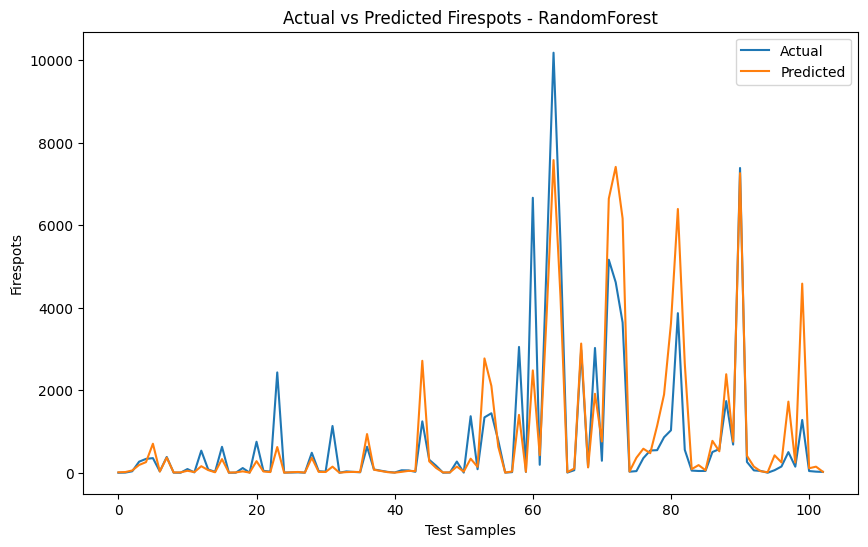

In [43]:
# Plot actual vs predicted firespots
best_model_name = 'RandomForest'
model = best_models[best_model_name]
y_pred = model.predict(X_validation)
y_pred = y_pred.astype('int')
y_pred = np.clip(y_pred, 0, None)

# Plot actual vs predicted firespots
plt.figure(figsize=(10, 6))
plt.plot(y_validation.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f"Actual vs Predicted Firespots - {best_model_name}")
plt.xlabel("Test Samples")
plt.ylabel("Firespots")
plt.legend()
plt.show()

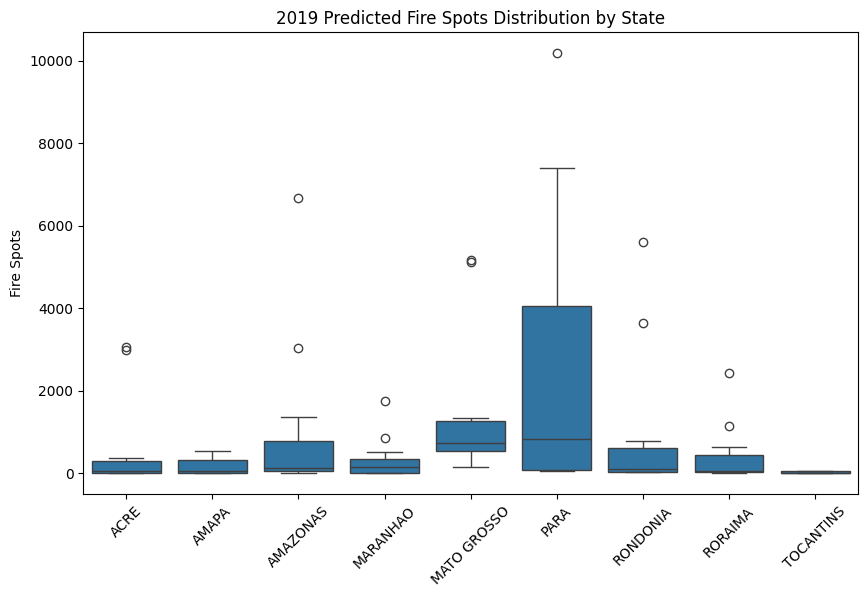

In [44]:
# Prediction 2019
prediction_2019 = pd.concat([X_validation, y_validation], axis=1)
prediction_2019['state'] = label_encoder.inverse_transform(prediction_2019['state_encoded'])
prediction_2019.drop(columns=['state_encoded'], inplace=True)

# Box Plot by State (Encoded)
plt.figure(figsize=(10, 6))
sns.boxplot(data=prediction_2019, x='state', y='firespots')
plt.title('2019 Predicted Fire Spots Distribution by State')
plt.ylabel('Fire Spots')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

States like Mato Grosso and Pará, showing high median values and variability, may require more robust fire management resources to handle both the typical and extreme fire scenarios.

For the expected outliers, targeted preventive measures during specific high-risk periods could be beneficial, associated with appropriate monitoring to provide responsive response to unexpected fire outbreaks.

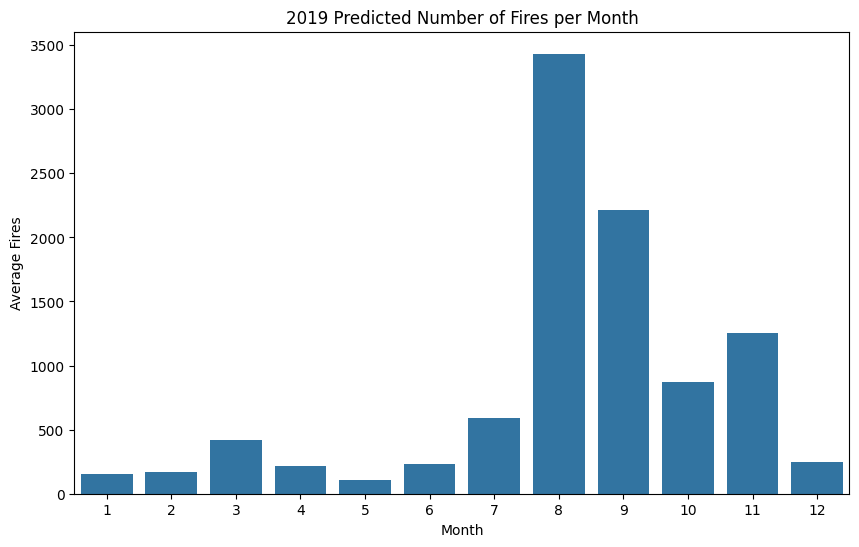

In [45]:
# Bar Plot of predicted fire per month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='firespots', data=prediction_2019, estimator=np.mean, errorbar=None)
plt.title('2019 Predicted Number of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Average Fires')
plt.show()

The chart shows a dramatic increase in predicted fires in August, with over 3000 predicted fires, indicating that this month will be the peak of the fire season. Therefore, public awareness campaigns and the allocation of resources should be affected to the appropriate areas in this month to mitigate the increase of the fire.

# Future Improvements

The performance indicates there is significant room for improvement in model performance. Taking steps to understand and address the high error rates will be essential in enhancing the model's predictive accuracy.

* Adjusting the model complexity could potentially improve these metrics. For complex data, a more sophisticated model or better feature engineering might reduce the error.
* Reviewing the data quality and considering additional features or alternative representations of the current features could also help.
* Recalibrating the model to improve its sensitivity to factors that drive higher fire incidences.
* Incorporating more localized data or additional features that capture regional environmental factors or human activities could help improve predictions.
* Better modeling of seasonal trends and inter-annual variability might also enhance the accuracy, considering the significant underestimations during peak fire months.